In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sklearn
from typing import Tuple
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
def load_iris_data() -> sklearn.utils.Bunch:
    iris = load_iris()
    return iris

In [3]:
# li = load_iris_data()
# print(type(li))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
def check_data(iris) -> pd.core.frame.DataFrame:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    return df.head(5)


In [5]:
# check_data(li)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
def linear_train_data(iris) -> Tuple[np.ndarray, np.ndarray]:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    X = df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
    y = df['sepal length (cm)'].values
    return X, y

In [7]:
# lin_x, lin_y = linear_train_data(li)

In [8]:
def logistic_train_data(iris) -> Tuple[np.ndarray, np.ndarray]:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    X = df.loc[np.where(iris.target < 2)].values
    y = iris.target[np.where(iris.target < 2)]

    return X, y

In [9]:
# log_x, log_y = logistic_train_data(li)

In [10]:
def split_data(X, y) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(lin_x, lin_y)
X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test = train_test_split(log_x, log_y)

In [12]:
def train_linear_regression(X_train, y_train) -> sklearn.linear_model._base.LinearRegression:
    return LinearRegression().fit(X_train, y_train)

In [13]:
# linr = train_linear_regression(X_linear_train, y_linear_train)
# print(type(linr))

<class 'sklearn.linear_model._base.LinearRegression'>


In [14]:
def train_logistic_regression(X_train, y_train) -> sklearn.linear_model._logistic.LogisticRegression:
    return LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)

In [15]:
# logr = train_logistic_regression(X_logistic_train, y_logistic_train)
# print(type(logr))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [16]:
def predict(model, X_test) -> np.ndarray:
    return model.predict(X_test)

In [17]:
# lin_pred = predict(linr, X_linear_test)
# log_pred = predict(logr, X_logistic_test)

In [18]:
def plot_actual_vs_predicted(y_test, y_pred) -> plt.Figure:
    fig, ax = plt.subplots()
    
    ax.set_title('Actual vs Predicted Target Values')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    ax.scatter(y_test, y_pred)

    return fig

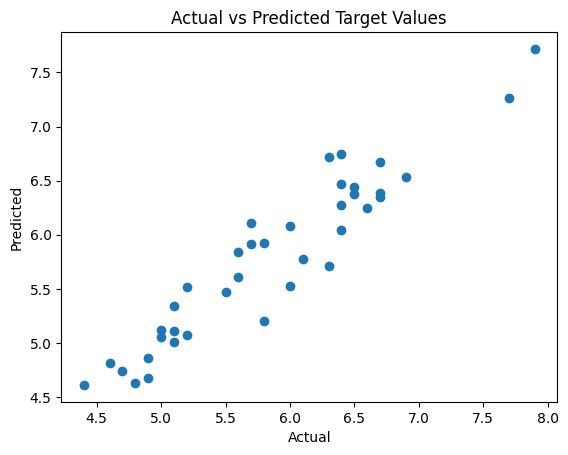

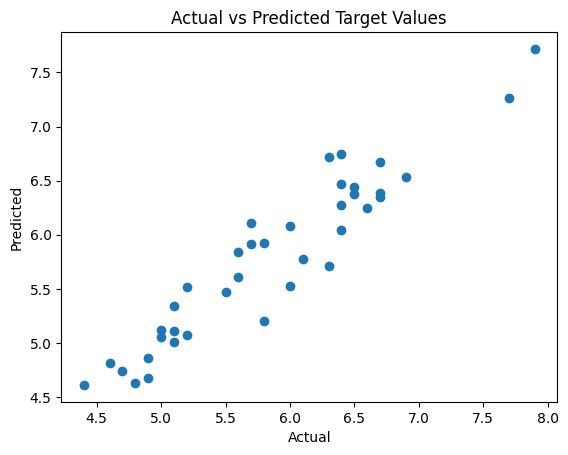

In [25]:
# plot_actual_vs_predicted(y_linear_test, lin_pred)


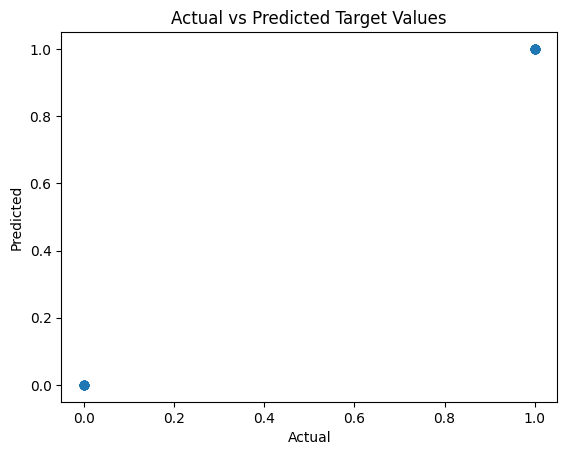

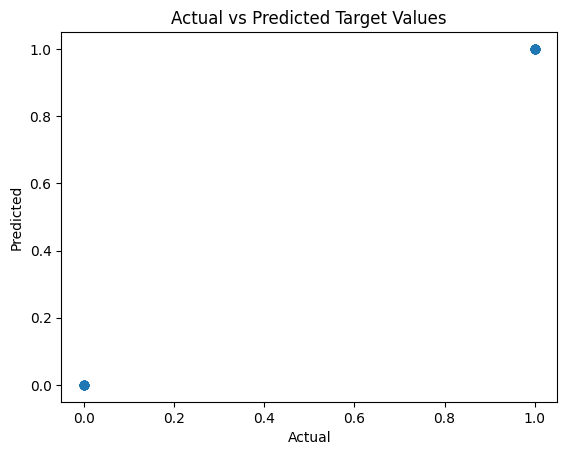

In [26]:
# plot_actual_vs_predicted(y_logistic_test, log_pred)

In [20]:
def evaluate_model(y_test, y_pred) -> float:
    return mean_squared_error(y_test, y_pred)

In [27]:
# evaluate_model(y_linear_test, lin_pred)


0.07547276191519307

In [28]:
# evaluate_model(y_logistic_test, log_pred)

0.0